# Week 1 class

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/goodman-imperial/discrete-maths-classes/blob/main/week-1-class.ipynb)

The aim of this class is to implement the Fibonacci algorithm using the following methods, and plot their timings (for $n=1$ to 100, except for the recursive algorithm where you should stop at $n=30$):

* Recursive
* Table
* Keep last two values
* Analytic (if you have time)
* Matrix (if you have time)

## Python

You can use any language you like, but I'll use Python for all my code samples and during the class. I think Python is very simple syntactically so the code samples should be easy enough to follow even if you don't know Python. On the other hand, I would strongly encourage you to learn it as it's an incredibly useful language. Here is a nice tutorial on Python, NumPy (numerical library for efficient array computation) and Jupyter (the notebook interface I'm using here):

* [Python Numpy Jupyter tutorial](https://cs231n.github.io/python-numpy-tutorial/)

Here is a little sample of plotting timings for a function in Python.

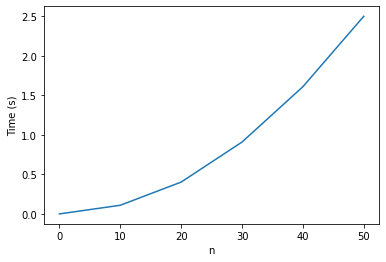

In [ ]:
# this first line is just used to make the plots appear nicely in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def fake_function(n):
    time.sleep(0.001*n*n)

def timeit(n):
    start = time.time()
    fake_function(n)
    end = time.time()
    return end-start

N = [0, 10, 20, 30, 40, 50]
T = [timeit(n) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)');

## Implementation notes on compiled languages

For the other ones, if you're using a compiled language, they might run so fast that in order to time them you should slow down the addition by adding a 1 microsecond wait. I've included a C++ ``busy_sleep`` function below to do that.

```c++
#include <chrono>
#include <iostream>
#include <fstream>

using namespace std;

// this function busy sleeps for n microseconds
void busy_sleep(int n)
{
    auto start = chrono::steady_clock::now();
    while(chrono::duration_cast<chrono::microseconds>(chrono::steady_clock::now() - start).count()<n) {};
}
```

Recursive method


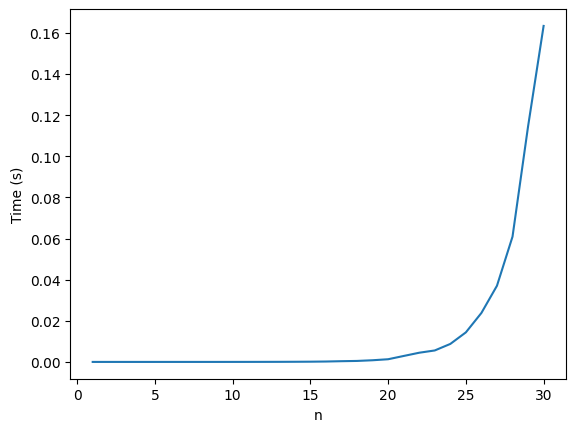

In [21]:
import time
import matplotlib.pyplot as plt

def fib(n):
    if n<=1:
      return 1
    else:
      return fib(n-1)+fib(n-2)

def timer(n):
    start = time.time()
    fib(n)
    end = time.time()
    return end - start

N = list(range(1, 31))
T = [timer(n) for n in N]

plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)');




Table Method

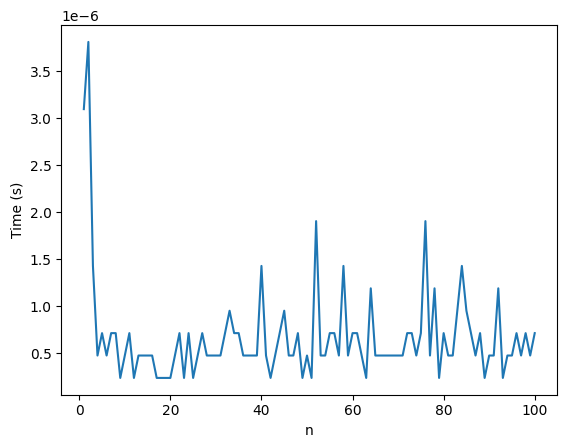

In [32]:
import time
import matplotlib.pyplot as plt

def fib(n, mem):
    while len(mem) <= n:
        mem.append(mem[-1] + mem[-2])

    return mem[n]

def timer(n):
    start = time.time()
    result = fib(n, mem)
    end = time.time()
    return end - start

mem = [1, 1]

N = list(range(1, 101))
T = [timer(n) for n in N]

plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)');